In [1]:
! pip install datasets transformers
!pip install -U sentence-transformers

     |████████████████████████████████| 270 kB 5.1 MB/s 
     |████████████████████████████████| 2.8 MB 59.2 MB/s 
     |████████████████████████████████| 123 kB 49.3 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 243 kB 50.0 MB/s 
     |████████████████████████████████| 1.3 MB 54.5 MB/s 
     |████████████████████████████████| 895 kB 42.8 MB/s 
     |████████████████████████████████| 3.3 MB 55.2 MB/s 
     |████████████████████████████████| 636 kB 40.3 MB/s 
     |████████████████████████████████| 142 kB 62.6 MB/s 
     |████████████████████████████████| 294 kB 64.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 29.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=

In [2]:
import pandas as pd

df_full = pd.read_excel("/content/drive/MyDrive/DiscourseMarkers/OUR/full.xlsx")
df_train = pd.read_excel("/content/drive/MyDrive/DiscourseMarkers/OUR/bg_train_bc.xlsx")
df_test = pd.read_excel("/content/drive/MyDrive/DiscourseMarkers/OUR/PT/PT.xlsx")

In [ ]:
import pandas as pd
df_test = pd.read_excel("/content/drive/MyDrive/DiscourseMarkers/OUR/BG/BGFull.xlsx")

In [ ]:
df_test.head()

,vid,lid,dm,enText,enContext,Discourse Marker Presence EN2,targetText,targetlangContext,Discourse Marker Presence BG,MWE BG
0,407,24,You know,"(Video) Man: You know, rather than drive today...",with delightful creative scraps. Here is one s...,9,Видео: Човек: Знаете ли - днес по-скоро ми се ...,с възхитителни креативни парченца. Ето едно па...,NaN,NaN
1,407,33,in fact,"In fact, she had aged a lot.",The woman who as a child had skipped with him ...,9,"Всъщност, доста беше остаряла.","Жената, която като дете бе подскачала с него п...",NaN,NaN
2,1202,0,You know,Do you know,Do you know that we have 1.4 million cellular ...,9,"Знаете ли, че","Знаете ли, че имаме 1,4 милиона клетъчни радио...",NaN,NaN
3,1202,27,in particular,"in particular, radio waves.",because it's so fundamental to our lives. And ...,9,"по-специално, радиовълни.",защото тя е от толкова фундаментално значение ...,NaN,NaN
4,1202,37,that is,That is efficiency.,and the number of bytes and data which are tra...,9,Това е ефективността.,"и количеството на байтовете и данните, които с...",NaN,NaN


In [ ]:
df_test.to_csv()

In [ ]:
df_test[df_test.text==df_test.text].to_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/BG/BG.csv", sep="|")

In [ ]:
df_test.rename(columns={"enText": "text", "Discourse Marker Presence BG": "label"},inplace=True)

In [ ]:
df_test.rename(columns={"targetText": "text"},inplace=True)

In [ ]:
df_test[["text","label"]].to_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/BG/test.csv",sep="|",index=False)

In [ ]:
df_full = pd.read_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/full.csv",sep="|")

In [4]:
df_lt_test = pd.read_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/LT/LTDatasetTrain.csv",sep="|")

In [5]:
df_lt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    490 non-null    object
 1   label   490 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [3]:
df_lt_test.to_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/LT/LaBSE_test_pred.csv")

NameError: ignored

In [ ]:
df_train.to_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/LT/LTDatasetTrain.csv",sep="|")
df_test.to_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/LT/LTDatasetTest.csv",sep="|")

In [ ]:
import pandas as pd
#df_test = pd.read_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/EN-corpus-Full-DM.csv")
df_test = pd.read_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/LT/LTDatasetTest.csv", sep="|")

In [ ]:
df_test.head(10)

,0,1
0,"Aš pasakiau administratoriui, turiu omeny, man...",1
1,"Žinote, pirmiausia jie buvo beatstumiantys man...",1
2,"ir, žinoma, kas dar galėtų ten būti.",1
3,ir todėl matome viską keičiančius ir gilius at...,1
4,"Man atrodo, tai yra užbaigimo ir pateikimo pro...",1
5,Bet juk čia visa ir esmė.,1
6,"Sakau, juk Pamelos Anderson kūne daugiau dirbt...",1
7,"Iš tikro, visuose šituose diskuose buvo dokume...",1
8,Bet iš tikro tai buvo sudėtinga -- tai buvo ti...,1
9,"Žinote, mes jau tai matėm -- turime dalykus su...",1


In [ ]:
from datasets import load_dataset
ds = load_dataset('csv', delimiter="|",   data_files={'train': ['/content/drive/MyDrive/DiscourseMarkers/OUR/full.csv'], 
                                           'test': ['/content/drive/MyDrive/DiscourseMarkers/OUR/EN/EN.csv']})

Using custom data configuration default-dec1ed61b7c94070


0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

KeyError: ignored

In [ ]:
ds["train"][2]

{'label': 0, 'text': 'and give us advice that is inherently biased.'}

In [ ]:
ds_test = load_dataset('csv',delimiter="|",data_files={"test":"/content/drive/MyDrive/DiscourseMarkers/OUR/BG/BG.csv"})

Using custom data configuration default-56c067aeefa4ec93


0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-56c067aeefa4ec93/0.0.0/9144e0a4e8435090117cea53e6c7537173ef2304525df4a077c435d8ee7828ff. Subsequent calls will reuse this data.


In [ ]:
ds["train"].rename_column_("Discourse Marker Presence BG", "label")
ds["test"].rename_column_("Discourse Marker Presence BG", "label")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: rename_column_ is deprecated and will be removed in the next major version of datasets. Use Dataset.rename_column instead.
  """Entry point for launching an IPython kernel.


In [ ]:
ds["train"]

NameError: ignored

In [ ]:
len(ds["train"]["label"])

490

In [ ]:
import numpy as np
np.asarray(ds["train"]["label"]).sum()

243

In [ ]:
ds["train"][0]

{'label': 1,
 'text': 'kokiu, manau, gali tapti šiuolaikinisstebuklas/orakulas, bet, o – ei,'}

In [ ]:
task = "OUR"
model_checkpoint = "sentence-transformers/LaBSE"
#model_checkpoint = "/content/drive/MyDrive/DiscourseMarkers/OUR/xlm-roberta-base/eval/checkpoint-97876/"
batch_size = 16

In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(ds["train"])

,text,label
0,"JF: But I mean, we ask questions like that",1
1,So I think the way forward for the world --,1
2,"I want to start with this slide,",0
3,"and what I think is under-reported,",0
4,"from the object of money, for example, people cheat more.",1
5,"and I calculated, you know, the psychological present",1
6,"This is not mine, by the way.",1
7,"We want to see and measure storms -- brainstorms, that is.",0
8,"DG: Yes, of course. So, if we knew that this was the worst attack",1
9,The red that you see in this photograph,0


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
tokenizer("Хал е тук, и мисля, че го дължа на него, а и на себе си,")

{'input_ids': [101, 303438, 15573, 702, 34230, 117, 705, 121163, 117, 15940, 15576, 701, 54998, 26955, 14984, 17881, 117, 697, 705, 14984, 18204, 15809, 117, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
task_to_keys = {
    "OUR":("text", None)
}

sentence1_key, sentence2_key = task_to_keys['OUR']

In [ ]:
def preprocess_function(examples):
    if sentence2_key is None:
        return tokenizer(examples[sentence1_key], truncation=True)
    return tokenizer(examples[sentence1_key], examples[sentence2_key], truncation=True)

In [ ]:
sentence1_key

'text'

In [ ]:
encoded_dataset_train = ds["train"].map(preprocess_function, batched=True)
encoded_dataset_test = ds["test"].map(preprocess_function, batched=True)
#encoded_dataset_valid = dataset_valid.map(preprocess_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
encoded_dataset_train[1]

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101, 18225, 15100, 16989, 117, 16945, 29775, 117, 102],
 'label': 1,
 'text': 'But you know, these stories,',
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [ ]:
ds_test["test"]

Dataset({
    features: ['Unnamed: 0', 'Unnamed: 0.1', 'vid', 'lid', 'dm', 'text', 'Discourse Marker Presence EN2', 'pred'],
    num_rows: 44186
})

In [ ]:
encoded_dataset_test = ds_test["test"].map(preprocess_function, batched=True)

  0%|          | 0/20 [00:00<?, ?ba/s]

In [ ]:
encoded_dataset_test[0]

In [ ]:
num_labels = 2

In [ ]:
model_checkpoint = "/content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE"

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

In [ ]:
metric_name = "accuracy"

In [ ]:
args = TrainingArguments(
    evaluation_strategy = "epoch",
    save_strategy = "no",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=15,
    weight_decay=0.01,
    save_total_limit=2,
    output_dir="/content/drive/MyDrive/DiscourseMarkers/OUR/xlm-roberta-large/eval"
)

In [ ]:
trainer = Trainer(
    model,
    args,
    #train_dataset=encoded_dataset_train,
    eval_dataset=encoded_dataset_test,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 1870
  Num Epochs = 15
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3510


Epoch,Training Loss,Validation Loss
1,No log,0.351888
2,No log,0.439991
3,0.348600,0.519308
4,0.348600,0.629083
5,0.142900,0.732920
6,0.142900,0.882940
7,0.051500,0.951859
8,0.051500,1.070227
9,0.018200,1.018134
10,0.018200,0.994818


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1023
  Batch size = 16
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1023
  Batch size = 16
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1023
  Batch size = 16
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 1023
  Batch size = 16
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClas

TrainOutput(global_step=3510, training_loss=0.08218863171643373, metrics={'train_runtime': 858.6808, 'train_samples_per_second': 32.666, 'train_steps_per_second': 4.088, 'total_flos': 264797638335960.0, 'train_loss': 0.08218863171643373, 'epoch': 15.0})

In [ ]:
predictions = trainer.predict(encoded_dataset_test)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: Discourse Marker Presence EN2, Unnamed: 0, dm, lid, enContext, targetlangContext, Discourse Marker Presence BG, text, vid, MWE BG, enText.
***** Running Prediction *****
  Num examples = 19209
  Batch size = 16


In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    y_pred, y_true = eval_pred
    y_pred = np.argmax(y_pred, axis=1)
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):    
        if yt == yp:
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [ ]:
trainer.save_model("/content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE/")

Saving model checkpoint to /content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE/
Configuration saved in /content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE/config.json
Model weights saved in /content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/DiscourseMarkers/OUR/LanguageAgnostic/LaBSE/special_tokens_map.json


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/DiscourseMarkers/OUR/BG/BG.csv",sep="|")

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209 entries, 0 to 19208
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19209 non-null  int64  
 1   vid                            19209 non-null  int64  
 2   lid                            19209 non-null  int64  
 3   dm                             19209 non-null  object 
 4   enText                         19209 non-null  object 
 5   enContext                      19209 non-null  object 
 6   Discourse Marker Presence EN2  19209 non-null  int64  
 7   text                           19209 non-null  object 
 8   targetlangContext              19209 non-null  object 
 9   Discourse Marker Presence BG   1870 non-null   float64
 10  MWE BG                         1629 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


In [ ]:
df_test["LaBSE_pred"]=np.argmax(predictions.predictions,axis=1)

In [ ]:
df_test.tail(10)

,Unnamed: 0,vid,lid,dm,enText,enContext,Discourse Marker Presence EN2,text,targetlangContext,Discourse Marker Presence BG,MWE BG,LaBSE_pred
19199,19199,1588,80,so far,so far. It seems to indicate that indeed,beige fragments that later on we ran a much mo...,9,"бяха много позитивни. Това показваше, че наистина","бежови фрагмента, които по-късно прегледахме ч...",NaN,NaN,0
19200,19200,1588,88,as a matter of fact,"As a matter of fact, this is by far the most i...","and most likely to Leonardo. Well, we are sear...",9,Това е най-значимият,и най-вероятно принадлежат на Леонардо да Винч...,NaN,NaN,0
19201,19201,1588,94,for example,"but basically to do what? Well, to assess, for...",the number one artist influence at the time. I...,9,"но какво правех? За да имам достъп, например,",художник номер едно. Аз също имах привилегията...,NaN,NaN,1
19202,19202,1588,103,for example,"For example, the ""Lady with the Unicorn,""",and some over cleaning. It becomes very visibl...,9,"Например, ""Дамата с еднорога"",",и няколко ретуша върху чистото. Става много ви...,NaN,NaN,0
19203,19203,1588,104,you see,"another painting by Rafael, well, you see the ...","But also, technology has helped to write new p...",9,"друга рисунка от Рафаел, виждате еднорога.",Технологията ни помогна да напишем нови страни...,NaN,NaN,0
19204,19204,1588,133,you see,"of ""The Adoration of the Magi."" Here you see",But I would say the discovery that really caug...,9,"на ""Обожанието на магите"". Тук виждате","Но ще кажа, че откритието, което погълна въобр...",NaN,NaN,0
19205,19205,1588,142,you see,They're magnificent. You see Leonardo at work.,"we have in Italy by Leonardo da Vinci, and loo...",9,Те са страхотни. Виждате как Леонардо да Винчи...,в Италия от Леонардо да Винчи и погледнете чуд...,NaN,NaN,0
19206,19206,1588,143,you see,"You see the geniality of his creation, right d...",look at the wonderful images of faces that nob...,9,"Виждате гениалността на творбата му,","погледнете чудесните лица, които никой не е ви...",NaN,NaN,0
19207,19207,1588,174,for example,"we can continue the scroll to find out, for ex...",and we see the elephant. (Applause) (Applause)...,9,"можем да продължим да превъртаме и да намерим,...",и виждаме слона. (Аплодисменти) (Аплодисменти)...,NaN,NaN,1
19208,19208,1588,180,you see,"not just the iconography as you see it, but th...","from the ruins of an old temple a new temple, ...",9,"не само иконографията, но и иконологията,","от руините на стар храм нов храм, и много хора...",NaN,NaN,0


In [ ]:
df_test.to_excel("/content/drive/MyDrive/DiscourseMarkers/OUR/BG/BG_preds.xlsx")

In [ ]:
df_test.to_excel("/content/drive/MyDrive/DiscourseMarkers/OUR/EN-corpus-Full-annotated.xlsx")

In [ ]:
df_test[df_test.pred!=df_test["Discourse Marker Presence EN"]].head()

,Unnamed: 0,vid,lid,MWE EN,Sentence chunk EN,Context EN,Discourse Marker Presence EN,Sentence chunk BG,Context BG,Discourse Marker Presence BG,pred
7,326,871,45,"You know,I mean","Now, you know, I mean, a lot of people go to c...",not so much this issue of the 1980 convention ...,0,"Искам да кажа, разбирате ли, много хора ходят ...",а не толкова този въпрос за конвенцията от 198...,1,1
8,328,871,49,I mean,"They go to church, by which I mean,",I'm not talking about that only conservatives ...,0,"Те ходят на църква, с което имам предвид,","Не казвам, че само консерваторите ходят на цър...",0,1
9,334,871,201,of course,"Indeed, Mickey Mouse himself, of course,","were in the public domain and remixed them, or...",0,"Наистина, самият Мики Маус, разбира се,","които са били в обществената сфера, на които е...",1,1
20,1143,1631,78,I think,"and the sense, I think if anything, of impendi...","Felix Baumgartner going up, rather than just c...",0,"и усещането за, по-скоро, неизбежна участ.","как Феликс Баумгартнър се изкачва, а не само к...",0,1
21,1150,1631,163,You know,on a cruise to Antarctica next year. You know.,"""Hasn't, you know, that's interesting, hasn't ...",0,ходи на круиз до Антарктика следващата година.,"""Това е интересно, но оня водещ Блу Питър не г...",0,1


In [ ]:
compute_metrics((predictions.predictions,predictions.label_ids))

0.8877005347593583

In [ ]:
compute_metrics((predictions.predictions,predictions.label_ids))

0.8957219251336899

In [ ]:
compute_metrics((predictions.predictions,predictions.label_ids))

0.8957219251336899

In [ ]:
compute_metrics((predictions.predictions,predictions.label_ids))

0.833822091886608

In [ ]:
compute_metrics((predictions.predictions,predictions.label_ids))

0.7272727272727273

In [ ]:
compute_metrics((predictions.predictions,predictions.label_ids))

0.5755102040816327

In [ ]:
predictions.label_ids

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 8.7 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491640 sha256=70e2163a3808e7d3b265aeb7d207b42240a1a86d59762c26c776a76786bea811
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
def add_column(example):
  example['text'] = example['Sentence chunk EN'] 
  return example

In [ ]:
ds["test"] = ds["test"].map(add_column)

  0%|          | 0/374 [00:00<?, ?ex/s]

In [ ]:
ds["train"] = ds["train"].map(add_column)

  0%|          | 0/1496 [00:00<?, ?ex/s]

In [ ]:
ds["test"][0]

{'Context BG': 'унищожавайки статистическата значимост на теста. Така че аз се вгледах внимателно в този човек. Той беше с около 20 години по-възрастен от всеки друг от извадката. И си спомних, че един стар и пиян човек дойде един ден в лабораторията, който искаше да изкара лесни пари,',
 'Context EN': 'destroying my statistical significance of the test. So I looked carefully at this guy. He was 20-some years older than anybody else in the sample. And I remembered that the old and drunken guy came one day to the lab wanting to make some easy cash',
 'Discourse Marker Presence BG': 0,
 'MWE EN': 'I remember',
 'Sentence chunk BG': 'И си спомних, че един стар и пиян човек',
 'Sentence chunk EN': 'And I remembered that the old and drunken guy',
 'Unnamed: 0': 0,
 'Unnamed: 0.1': 95,
 'label': 0,
 'lid': 68,
 'text': 'And I remembered that the old and drunken guy',
 'vid': 1212}

In [ ]:
def f(x):
    print(x)
    #tv = tokenizer.encode(x[sentence1_key], x[sentence2_key], padding=True, truncation=True, return_tensors="pt")
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=200, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 2.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491644 sha256=70b925085dd340d93036f8f6c0501a2f98fd240517cce74a3ba021fd89f9cd61
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap
import torch
import numpy as np
import scipy as sp

# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer, algorithm='partition')
shap_values = explainer(ds["train"][:10])

In [ ]:
y_pred

In [ ]:
# plot the first sentence's explanation
shap.plots.text(shap_values[5])

In [ ]:
ds["train"][5]

{'Context BG': 'ако разберем дълбоките механизми, на това защо и къде се проваляме, всъщност можем да се надяваме да оправим нещата. И това, мисля, е надеждата. Благодаря ви много. (Ръкопляскане)',
 'Context EN': 'if we understand the deep mechanisms of why we fail and where we fail, we can actually hope to fix things. And that, I think, is the hope. Thank you very much. (Applause)',
 'Discourse Marker Presence BG': 1,
 'MWE EN': 'I think',
 'Sentence chunk BG': 'И това, мисля, е надеждата. Благодаря ви много.',
 'Sentence chunk EN': 'And that, I think, is the hope. Thank you very much.',
 'Unnamed: 0': 5,
 'Unnamed: 0.1': 102,
 'label': 1,
 'lid': 127,
 'text': 'And that, I think, is the hope. Thank you very much.',
 'vid': 1212}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

import matplotlib.pyplot as plt
import itertools 
import numpy as np


# In[35]:


class Evaluator:
    def __init__(self,y_true,y_pred):
        self.y_true = y_true;
        self.y_pred = y_pred;
    
    def _eval(self):
        return confusion_matrix(self.y_true,self.y_pred).ravel() 
    
    def acc(self):
        return accuracy_score(self.y_true,self.y_pred)
    
    def precision(self):
        return precision_score(self.y_true,self.y_pred)
    
    def recall(self):
        return recall_score(self.y_true,self.y_pred)
    
    def specificity(self):
        tn, fp, fn, tp = self._eval()
        return tn/(tn+fp);
    
    def f1(self):
        return f1_score(self.y_true,self.y_pred)
    
    def mcc(self):
        return matthews_corrcoef(self.y_true,self.y_pred)
    
    def report(self):
        return self.acc(),self.precision(),self.recall(),self.specificity(),self.f1(),self.mcc();
    
    def print_report(self):
        a,p,r,s,f,m=self.report();
        print("Accuracy: %.4f" % a);
        print("Precision: %.4f" % p);
        print("Recall: %.4f" % r);
        print("Specificity: %.4f" % s);
        print("F1-Score: %.4f" % f);
        print("MCC: %.4f" % m);
        
    def plot_confusion_matrix(self, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        
        cm = confusion_matrix(self.y_true,self.y_pred)
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        plt.tight_layout()

In [ ]:
eval = Evaluator(predictions.label_ids, np.argmax(predictions.predictions,axis=1))

In [ ]:
eval.print_report()

Accuracy: 0.7273
Precision: 0.7403
Recall: 0.7090
Specificity: 0.7459
F1-Score: 0.7243
MCC: 0.4551


Confusion matrix, without normalization


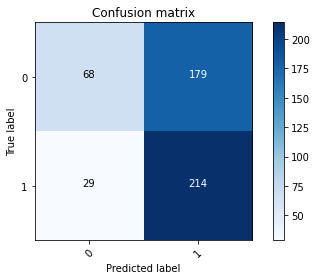

In [ ]:
eval.plot_confusion_matrix(classes=[0,1])

In [ ]:
eval.print_report()

Accuracy: 0.8338
Precision: 0.9412
Recall: 0.8758
Specificity: 0.2877
F1-Score: 0.9073
MCC: 0.1228


In [ ]:
eval.print_report()

Accuracy: 0.5755
Precision: 0.5445
Recall: 0.8807
Specificity: 0.2753
F1-Score: 0.6730
MCC: 0.1957
